Importing the modules and the dataset

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784',version=1)

The dataset is divided into 2 groups the `data` and the `target`.

the `data` contains the images (70000 arrays of 28*28=784) each column is a pixel (a number between 0 and 16, 0 for white 16 for black)

The `target` part contains the labels, the number which is represented in the array (from o to 9) 

In [0]:
print(type(mnist.data))
print(mnist.data.shape)
print(mnist.target.shape)

<class 'numpy.ndarray'>
(70000, 784)
(70000,)


# **Sampling**

For a memory based model which uses a k-nn, 70000 exemples is way too much for the calculation cost and the memory.
So we're gonna work on a sample of 5000 exemples:

In [0]:
sample = np.random.randint(70000,size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

# **Spliting**

spliting the samples into training and testing samples:

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

# **The model**

We are going to use the k-nn algorithme available in the sklearn framework

In [0]:
#importing the model
from sklearn import neighbors

#initializing the model
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
#testing
knn.score(xtest,ytest)

0.927

# **Optimizing**
We can tweak our model to have better performances by changing the hyper-parameter k.

we're gonna search for a good value of k using the loss history.

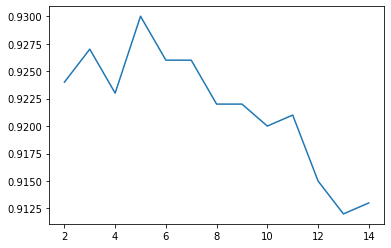

In [0]:
score = []
for k in range(2,15):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  score.append(knn.score(xtest,ytest))


import matplotlib.pyplot as plt
plt.plot(range(2,15), score)

We can see that our model is more performent with k=5, so our final optimal model will be a 5-nn.

# **Testing**
we're gonna test some values

In [0]:
# we train our model with the optimal k
knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)

# get the prediction for our testing data
predicted = knn.predict(xtest)

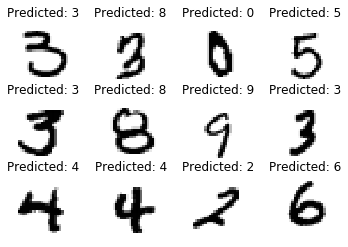

In [0]:
# reshaping the data to get images
images = xtest.reshape((-1, 28, 28))

# geting a sample of 12 images
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()